# Занятие 1. Введение в Машинное обучение

**Цель данного занятия** заключается в том, что бы научить вас работать с табличными данными с использованием модуля [pandas](https://pandas.pydata.org/), а также делать агрегаты и визуализировать их, что бы вы могли лучше понять природу тех данных, с которыми работаете.

## Чтение таблицы

Далее **загрузим таблицу** `Netflix.csv`, которая содержит информацию о статьях, опубликованных в различных изданиях. 

Для загрузки данных из csv-таблиц используется метод [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [5]:
import pandas as pd

table = pd.read_csv('Netflix.csv')

Для того, что бы посмотреть на первые несколько строк таблицы, с которой вы начинаете работать, воспользуйтесь методом [pandas.DataFrame.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)

In [6]:
table.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


Данная таблица содержит следующие колонки:
    
    show_id : идентификатор для каждого фильма/ шоу
    
    type : Movie или TV Show
    
    title : заголовок 
    
    director : имя режиссёра
    
    cast : задействованные актёры
    
    country : страна где фильм/ шоу продюссировалось
    
    date_added : дата добавления на Netflix
    
    release_year : год релиза фильма/ шоу
    
    rating : телевизионный рейтинг
    
    duration : продолжительность в минутах или в числе сезонов
    
    listed_in : набор тэгов 
    
    description : описание

Видим, что в таблицы содержится идентификатор для каждого фильма/ шоу. Далее будем использовать его в качестве индекса таблицы.

Для этого можно воспользоваться методом [pandas.DataFrame.set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html), если таблица уже прочитана.

In [7]:
table = table.set_index('show_id')

Также мы можем указать, какую колонку хотим использовать в качестве индекса в момент прочтения таблицы, передав индекс нужной колонки в качестве аргумента `index_col`.

In [11]:
table = pd.read_csv('Netflix.csv', index_col=0)

table.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Работа с пропусками

Теперь с помощью метода [pandas.DataFrame.isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) посмотрим, в каких столбцах есть пропущенные значения, 

а также посчитаем их количество с помощью метода [pandas.Series.sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html?highlight=sum#pandas.Series.sum).

In [12]:
for column in table.columns:
    print(f'{column.upper()}: {table[column].isna().sum()}')
    
print(f'\nTotal rows: {len(table)}')

TYPE: 0
TITLE: 0
DIRECTOR: 2634
CAST: 825
COUNTRY: 831
DATE_ADDED: 10
RELEASE_YEAR: 0
RATING: 4
DURATION: 3
LISTED_IN: 0
DESCRIPTION: 0

Total rows: 8807


### Столбцы `duration` и `rating`

Выведем на экран все строчки, в которых пропущены значение в стобце `duration` или `rating`, 

используя методы [pandas.DataFrame.isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) и [pandas.DataFrame.any](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html?highlight=any#pandas.DataFrame.any)

In [13]:
flags = table[['duration', 'rating']].isna().any(axis=1)

table[flags]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Видим, что в первых трёх строчках перепутаны местами `duration` и `rating`. Получается, что во всех данных случаях пропущен именно рейтинг.

Сначала востановим правильный порядок значений в первых трёх строчках, используя [pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc)

In [14]:
import numpy as np

indexes = table[table['duration'].isna()].index  # ['s5542', 's5795', 's5814']

table.loc[indexes, 'duration'] = table.loc[indexes, 'rating']
table.loc[indexes, 'rating'] = np.nan

In [15]:
table[flags]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


**Вопрос**: Что будем делать с данными пропусками? Почему?

Удалим данные строчки используя [pandas.DataFrame.notna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html#pandas.DataFrame.notna)

In [16]:
table = table[table['rating'].notna()]

### Столбец `date_added`

Выведем на экран все строчки, в которых пропущены значение в стобце `date_added`, используя метод [pandas.Series.isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isna.html?highlight=isna#pandas.Series.isna)

In [18]:
flags = table['date_added'].isna()
table[flags]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


Мы можем также удалить данные записи, так как эта группа не является многочисленной. 

Но только посмотрите, здесь же сериал **Friends** ;-) Давайте придумаем, что-то ещё!

**Вопрос**: Как можно востановить данные пропуски?

Давайте считать, что на Netflix данные сериалы были добавлены 31 декабря в год релиза, и 

сделаем соответсвующее заполнение воспользовавщись приёмами, рассмотренными ранее, а также [pandas.Series.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html?highlight=apply#pandas.Series.apply)

In [19]:
indexes = table[flags].index

table.loc[indexes, 'date_added'] = table.loc[indexes,'release_year'].apply(lambda x: f'December 31, {x}')

### Столбец `country`

Пропуске в данном столбце содердатся уже в 10% данных, которые бы не хотелось терять. 

**Вопрос**: Может ли странна зависить от других данных в таблицы и от каких?

Проверим **гипотезу**, что страну можно востановить по . 

Для этого по всей таблицы сформируем словарь `director`:`country`

In [20]:
directors = table['director'].dropna().apply(lambda x: x.split(', '))

director_counts = directors.explode().value_counts()
director_counts = director_counts[director_counts > 1]

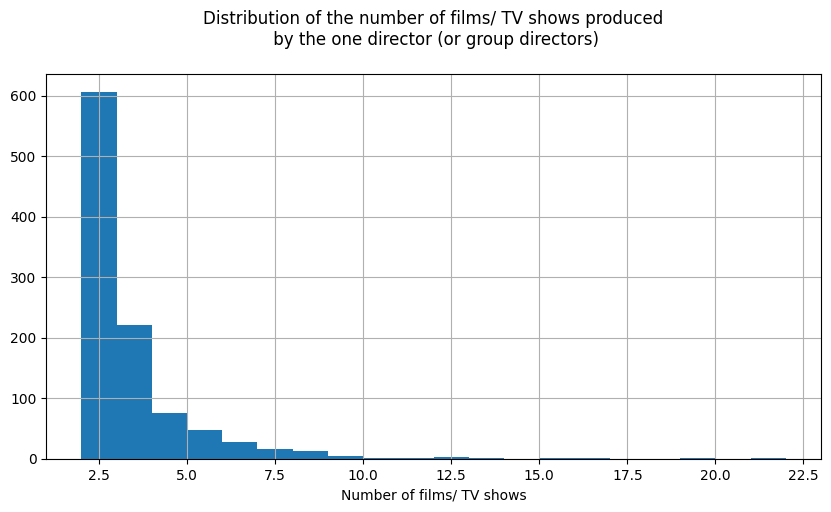

In [21]:
import matplotlib.pyplot as plt

plt.title('Distribution of the number of films/ TV shows produced\n by the one director (or group directors)\n')
director_counts.hist(bins=20, figsize=(10, 5))
plt.xlabel('Number of films/ TV shows')
plt.show()

In [22]:
unique_directors = set(director_counts.index)
flags = directors.apply(lambda x: bool(set(x) & unique_directors))

directors = directors[flags]
countries = table.loc[directors.index, 'country']

flags = countries.notna()

directors = directors[flags]
countries = countries[flags].apply(lambda x: x.split(', '))

In [23]:
from collections import Counter

vocabulary = dict()
for directors, countries in zip(directors, countries):
    for director in directors:
        vocabulary.setdefault(director, Counter())
        for country in countries:
            vocabulary[director][country] += 1   
            
vocabulary = {director: countries.most_common()[0][0] for director, countries in vocabulary.items()}

print(f'Lenght vocabulary: {len(vocabulary)}')

Lenght vocabulary: 1222


In [24]:
flags = table['country'].isna()
print(f'Total NaN in column `country`: {flags.sum()}')

Total NaN in column `country`: 830


In [25]:
flags &= table['director'].notna()
print(f'Total NaN in column `country`: {flags.sum()}')

Total NaN in column `country`: 422


In [26]:
table.loc[flags, 'country'] = table.loc[flags, 'director'] \
                                   .apply(lambda x: x.split(', ')) \
                                   .apply(lambda x: [vocabulary[director] for director in x if director in vocabulary]) \
                                   .apply(lambda x: ', '.join(x) if x else np.nan)

In [27]:
flags = table['country'].isna()
print(f'Total NaN in column `country` after map: {flags.sum()}')

Total NaN in column `country` after map: 659


**Востановили 16% процентов пропусков**

Сколько процентов пропусков удалось востановить?

Заменим оставшиеся пропуски на наиболее популярную странну, используя метод [pandas.Series.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html?highlight=fillna#pandas.Series.fillna)

In [28]:
table['country'].dropna().apply(lambda x: x.split(', ')).explode().value_counts()

United States     3728
India             1119
United Kingdom     808
Canada             445
France             397
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 127, dtype: int64

In [29]:
table['country'].fillna('United States', inplace=True)

### Столбец `director`

Попробуем обучить [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) предсказывать режиссёра для востановления пропущенных значений. 

    1. Выделим все строки, для которых извесны режиссёры
       Вопрос: Для чего мы их будем использовать для обучения, теста или того и другого?

In [30]:
X = table[table['director'].notna()]

    2. Определимся с тем какая задача перед нами стоит: бинарная, многоклассовая или многозначная классификация?

In [31]:
Y = X['director'].apply(lambda x: x.split(', '))

Y_counts = Y.explode().value_counts()
Y_counts = Y_counts[Y_counts > 2]

Y_unique = set(Y_counts.index)
Y = Y.apply(lambda x: set(x) & Y_unique)

flags = Y.apply(bool)
print(f'Total {flags.sum()} examples with popular director') 

Total 1684 examples with popular director


In [32]:
Y = Y[flags]

flags = Y.apply(len) == 1
print(f'{round(flags.sum() / len(flags), 2)}% examples with one director') 

0.94% examples with one director


In [33]:
Y = Y[flags].apply(lambda x: x.pop())
X = X.loc[Y.index]

    3. Определимся с тем, какие признаки будем использовать для обучения, а также с их корректным представлением

In [34]:
X.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


Тип закодируем в качестве бинарного признака: является ли фильмом или нет.
    
Далее посмотрим на распределение количества контента по годам:

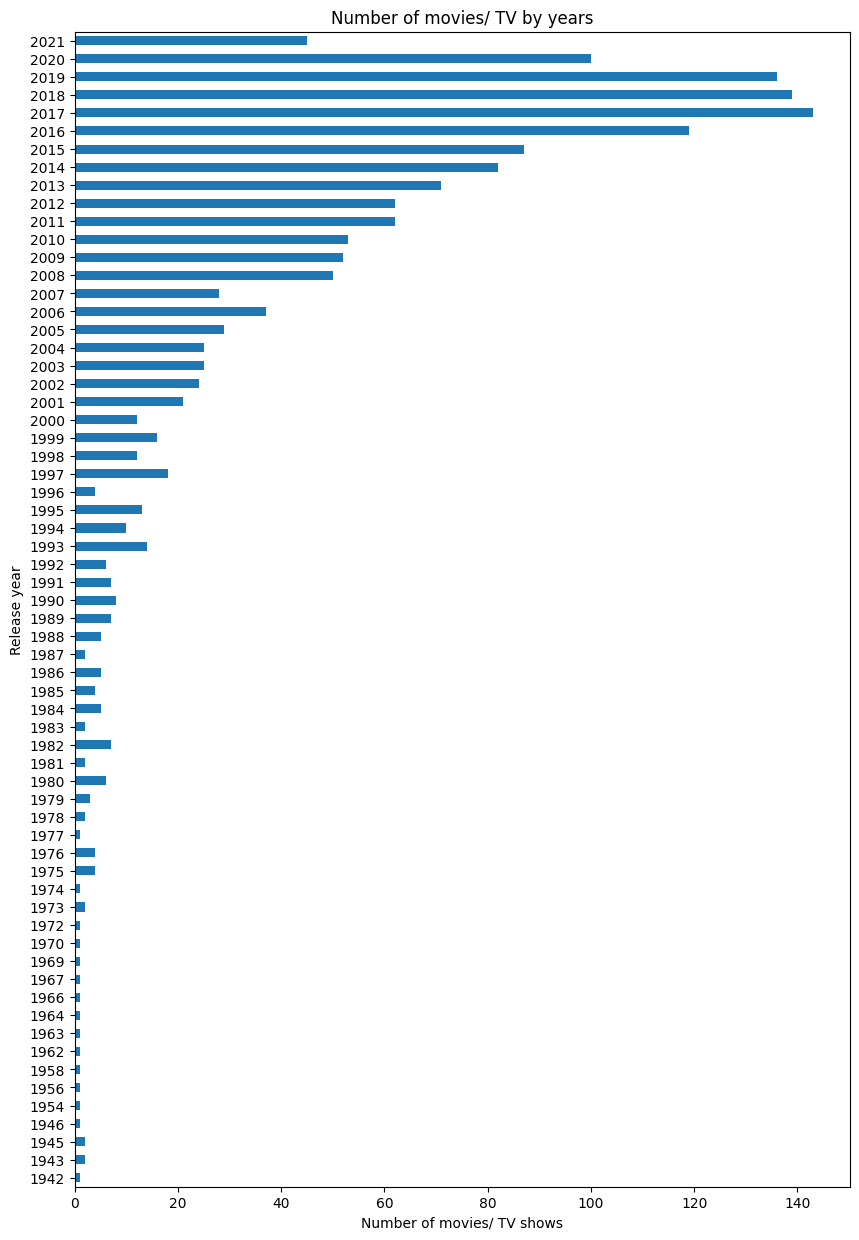

In [35]:
plt.title('Number of movies/ TV by years')
X['release_year'].value_counts().sort_index(ascending=True).plot.barh(figsize=(10, 15))
plt.xlabel('Number of movies/ TV shows')
plt.ylabel('Release year')
plt.show()

Далее можем ограничиться только рассмотрением контента, опублекованного после 2000 года

In [36]:
flags = X['release_year'] >= 2000

print(f'Total {flags.sum()} examples') 

Total 1402 examples


In [37]:
X = X[flags]
Y = Y[flags]

Для кодирования даты релиза и рейтинга воспользуемся [sklearn.preprocessing.LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

Столбцы со страной и тэгами бинаризуем с помощью [sklearn.preprocessing.MultiLabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html), для этого сначала разобъём их по разделителю.

In [373]:
X['country'] = X['country'].apply(lambda x: x.split(', '))
X['listed_in'] = X['listed_in'].apply(lambda x: x.split(', '))

In [38]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

class Binarizer(TransformerMixin):
    def __init__(self):
        self.year_binarizer = LabelBinarizer()
        self.rating_binarizer = LabelBinarizer()
        self.country_binarizer = MultiLabelBinarizer()
        self.tag_binarizer = MultiLabelBinarizer()
    
    def fit(self, X):
        self.year_binarizer.fit(X['release_year'])
        self.rating_binarizer.fit(X['rating'])
        self.country_binarizer.fit(X['country'])
        self.tag_binarizer.fit(X['listed_in'])
        return self
    
    def transform(self, X):
        is_movie = (X['type'] == 'Movie').astype(int)
        is_movie.rename('Movie', inplace=True)
        
        bin_year = self.year_binarizer.transform(X['release_year'])
        bin_year = pd.DataFrame(bin_year, columns=self.year_binarizer.classes_, index=X.index)
        
        bin_rating = self.rating_binarizer.transform(X['rating'])
        bin_rating = pd.DataFrame(bin_rating, columns=self.rating_binarizer.classes_, index=X.index)
        
        bin_country = self.country_binarizer.transform(X['country'])
        bin_country = pd.DataFrame(bin_country, columns=self.country_binarizer.classes_, index=X.index)
        
        bin_tag = self.tag_binarizer.transform(X['listed_in'])
        bin_tag = pd.DataFrame(bin_tag, columns=self.tag_binarizer.classes_, index=X.index)
        
        return pd.concat([is_movie, bin_year, bin_rating, bin_country, bin_tag], axis=1)

    4. Разобьём выборку на train и test

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [41]:
binarizer = Binarizer()

X_train = binarizer.fit_transform(X_train)
X_test = binarizer.transform(X_test)

    5. Обучаем модель на train

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [43]:
Y_pred = knn.predict(X_test)

    6. Оцениваем качество на test

In [44]:
print('Accuracy', (Y_test == Y_pred).sum() / len(X_test), f'({len(Y.unique())} classes)')

Accuracy 0.1794871794871795 (371 classes)


In [45]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

                          precision    recall  f1-score   support

             Abhinay Deo       0.00      0.00      0.00         1
        Abhishek Chaubey       0.00      0.00      0.00         1
         Abhishek Kapoor       0.00      0.00      0.00         0
         Abhishek Sharma       0.00      0.00      0.00         0
              Adam McKay       0.00      0.00      0.00         0
           Adam Shankman       0.00      0.00      0.00         2
         Adriano Rudiman       0.50      1.00      0.67         1
               Adze Ugah       0.00      0.00      0.00         0
          Ahmad El-Badri       0.00      0.00      0.00         0
          Ahmed Al-Badry       0.00      0.00      0.00         1
       Ahmed Nader Galal       0.00      0.00      0.00         1
          Akiva Schaffer       0.00      0.00      0.00         0
     Alastair Fothergill       1.00      1.00      1.00         1
               Alex Díaz       0.33      1.00      0.50         1
         